In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
pd.set_option('Display.max_columns',None)
data=pd.read_csv('/Users/tanvirislamullash/Downloads/CardioVascularDisease/cardio_train.csv',sep=';')

In [76]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [110]:
data.cardio.unique()

array([0, 1])

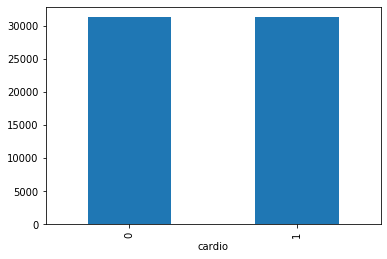

In [114]:
data.groupby(['cardio']).cardio.count().plot.bar()

In [79]:
def rename(data):
    data.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 
                   'alco': 'alcohol'}, inplace=True)
    return data

In [80]:
data=rename(data)

In [81]:
def col_map(data,column):
    data[column]=data[column]%2
    return data
data=col_map(data,'gender')

In [82]:
data.gender.unique()

array([1, 0])

In [83]:
# 0 --> Male , 1 --> Female
data['gender']=data['gender']%2

In [84]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'systolic', 'diastolic',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio'],
      dtype='object')

In [85]:
data.describe()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,0.650481,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


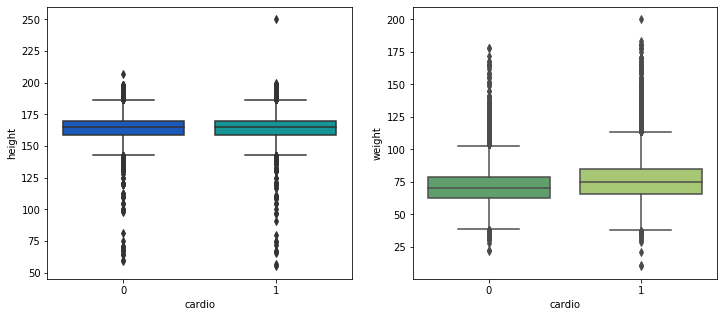

In [72]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=data,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=data,palette='summer')


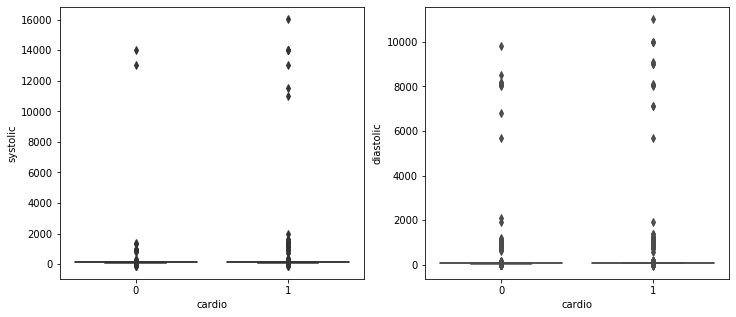

In [99]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='systolic',data=data,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='diastolic',data=data,palette='summer')

In [86]:
def trans_bmi(data,column):
    data[column]=data[column]*0.01
    data['bmi']=data['weight']/data[column]**2
    return data
data=trans_bmi(data,'height')

In [87]:
data.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardio,bmi
0,988,22469,1,1.55,69.0,130,80,2,2,0,0,1,0,28.720083
1,989,14648,1,1.63,71.0,110,70,1,1,0,0,1,1,26.722873
2,990,21901,1,1.65,70.0,120,80,1,1,0,0,1,0,25.711662
3,991,14549,0,1.65,85.0,120,80,1,1,1,1,1,0,31.221304
4,992,23393,1,1.55,62.0,120,80,1,1,0,0,1,0,25.806452


In [88]:
#data['height']=data.height*0.01
data['age']=(data.age/365).astype(int)
#data['bmi']=data['weight']/data['height']**2

In [89]:
ap_list = ['systolic','diastolic','height','weight','age',]
boundary = pd.DataFrame(index=["normal_lower_bound","normal_upper_bound","extreme_lower_bound","extreme_upper_bound"]) # We created an empty dataframe
for each in ap_list:
    Q1 = data[each].quantile(0.25)
    Q3 = data[each].quantile(0.75)
    IQR = Q3 - Q1

    normal_lower_bound = Q1- 1.5*IQR
    normal_upper_bound = Q3 + 1.5*IQR
    extreme_lower_bound = Q1- 3*IQR
    extreme_upper_bound = Q3 + 3*IQR
    boundary[each] = [normal_lower_bound, normal_upper_bound,extreme_lower_bound,extreme_upper_bound ]
boundary

,systolic,diastolic,height,weight,age
normal_lower_bound,90.0,65.0,1.425,39.5,33.0
normal_upper_bound,170.0,105.0,1.865,107.5,73.0
extreme_lower_bound,60.0,50.0,1.260,14.0,18.0
extreme_upper_bound,200.0,120.0,2.030,133.0,88.0


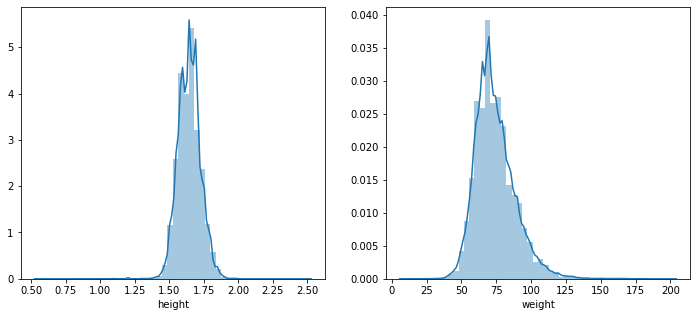

In [102]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data.height,kde=True)

plt.subplot(1,2,2)
sns.distplot(data.weight,kde=True)

In [23]:
# data.loc[data.height < 1.425, 'height'] = 142
# data.loc[data.height >1.86 , 'height'] = 186

# data.loc[data.weight < 39.5, 'weight'] = 39
# data.loc[data.weight >107.5 , 'weight'] = 107

In [90]:
def systolic_trim_data(data):
    data=data[data.systolic<185]
    data=data[data.systolic>90]
    return data
def diastolic_trim_data(data):
    data=data[data.diastolic<130]
    data=data[data.diastolic>65]
    return data

data=systolic_trim_data(data)
data=diastolic_trim_data(data)

In [108]:
data=data[data.systolic<185]
data=data[data.diastolic<130]

In [104]:
data=data[data.systolic>90]
data=data[data.diastolic>65]

In [91]:
data=data[data.height>1.425]
data=data[data.weight>39.5]

In [92]:
data=data[data.height<1.865]
data=data[data.weight<107.5]

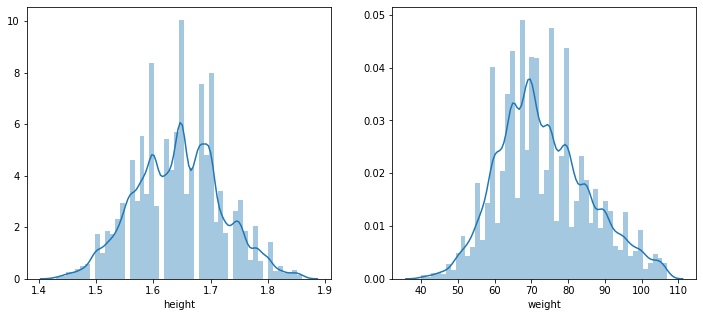

In [93]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data.height,kde=True)

plt.subplot(1,2,2)
sns.distplot(data.weight,kde=True)

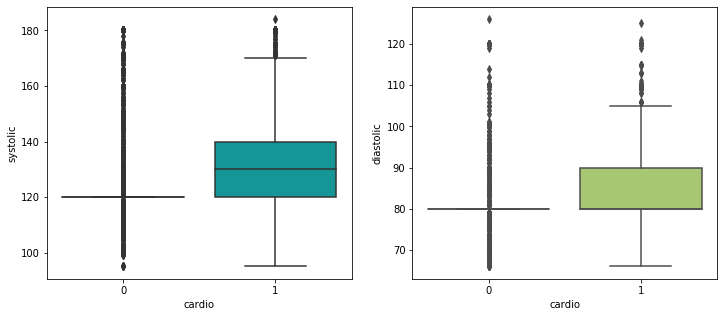

In [109]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='systolic',data=data,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='diastolic',data=data,palette='summer')


In [94]:
data.shape

(62546, 14)

In [95]:
def bucket(data):
    bins=[95,119,129,139,179,np.inf]
    data['pressure'] = pd.cut(data['systolic'].values, bins,labels=["normal","elevated","hi stage 1","hi stage 2","hi stage 3"],include_lowest=True)
    return data
data=bucket(data)

In [96]:
data.age.max()

64

In [104]:
def ordinal_labeling(data):
    ordered_labels = data.groupby(['pressure'])['cardio'].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)}
    data['pressure'] = data['pressure'].map(ordinal_label).astype(int)
    return data
data=ordinal_labeling(data)

In [105]:
ordinal_label

{'normal': 0, 'elevated': 1, 'hi stage 1': 2, 'hi stage 2': 3, 'hi stage 3': 4}

In [106]:
data.pressure.dtypes

dtype('int64')

In [99]:
bins=[29,35,40,45,50,55,60,64]
bin_lebel=['29-35','36-40','41-45','46-50','51-55','56-60','61-65']
data['age_range'] = pd.cut(data['age'],
                              bins=bins,
                              labels=bin_lebel,
                               include_lowest=True)

In [25]:
data.drop(['id','height','weight'],axis=1,inplace=True)

In [107]:
def ordinal_labeling(data):
    ordered_labels = data.groupby(['age_range'])['cardio'].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)}
    data['age_range'] = data['age_range'].map(ordinal_label).astype(int)
    print(ordinal_label)
    return data
data=ordinal_labeling(data)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [493]:
#data['map']=(2*data['diastolic']+data['systolic'])/3

In [486]:
X=data[['age','systolic','cholesterol']]
y=data['cardio']
model_evaluation(X,y,dt,knn,xgb,nb,rf,[])

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.721855,0.749747,0.676476,0.711279,0.766635
1,KNN Classifier,0.722363,0.749840,0.677842,0.712016,0.767065
2,Xgboost Classifier,0.722317,0.749848,0.677691,0.711936,0.767076
3,Gaussian NB Classifier,0.714321,0.800713,0.580235,0.672857,0.756767
4,Random Forest Classifier,0.722194,0.749662,0.677660,0.711836,0.766763


In [487]:
X=data[['age','systolic','cholesterol','smoke']]
y=data['cardio']
model_evaluation(X,y,dt,knn,xgb,nb,rf,[])

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.723070,0.756647,0.667335,0.709289,0.768607
1,KNN Classifier,0.723732,0.756379,0.670280,0.710726,0.769309
2,Xgboost Classifier,0.723486,0.756567,0.669248,0.710229,0.769491
3,Gaussian NB Classifier,0.709584,0.801993,0.566296,0.663824,0.758261
4,Random Forest Classifier,0.723255,0.756406,0.668853,0.709936,0.769094


In [489]:
X=data[['age','systolic','cholesterol','alcohol']]
y=data['cardio']
model_evaluation(X,y,dt,knn,xgb,nb,rf,[])

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.722271,0.753473,0.670888,0.709878,0.767498
1,KNN Classifier,0.723255,0.753642,0.673682,0.711412,0.768308
2,Xgboost Classifier,0.722778,0.753780,0.672042,0.710560,0.768294
3,Gaussian NB Classifier,0.711922,0.802115,0.572248,0.667947,0.757272
4,Random Forest Classifier,0.722670,0.753319,0.672528,0.710629,0.767735


In [490]:
X=data[['age','systolic','cholesterol','alcohol','smoke']]
y=data['cardio']
model_evaluation(X,y,dt,knn,xgb,nb,rf,[])

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.722993,0.758697,0.663933,0.708219,0.768453
1,KNN Classifier,0.723685,0.757602,0.668063,0.710011,0.769770
2,Xgboost Classifier,0.723762,0.758415,0.666879,0.709703,0.769900
3,Gaussian NB Classifier,0.708554,0.802811,0.562621,0.661568,0.757247
4,Random Forest Classifier,0.723270,0.758523,0.665270,0.708838,0.768891


In [494]:
X=data[['age','map','cholesterol','alcohol','smoke']]
y=data['cardio']
model_evaluation(X,y,dt,knn,xgb,nb,rf,[])

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.714951,0.742732,0.668519,0.703832,0.760498
1,KNN Classifier,0.715704,0.744202,0.668610,0.704213,0.762615
2,Xgboost Classifier,0.716197,0.743558,0.670918,0.705368,0.762684
3,Gaussian NB Classifier,0.701142,0.772906,0.580935,0.663117,0.749503
4,Random Forest Classifier,0.715212,0.742394,0.670129,0.704401,0.760974


In [264]:
X=data[['age','pressure','cholesterol','smoke']]
y=data['cardio']
model_evaluation(X,y,dt,knn,xgb,nb,rf,[])

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.726313,0.749803,0.683556,0.714638,0.788743
1,KNN Classifier,0.710613,0.726197,0.677195,0.700615,0.764465
2,Xgboost Classifier,0.727241,0.742797,0.695512,0.718337,0.792268
3,Gaussian NB Classifier,0.720462,0.760861,0.643310,0.697144,0.779778
4,Random Forest Classifier,0.726841,0.745103,0.690525,0.715696,0.789658


In [265]:
X=data[['age','pressure','cholesterol']]
y=data['cardio']
model_evaluation(X,y,dt,knn,xgb,nb,rf,[])

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.726441,0.748813,0.681191,0.713630,0.790088
1,KNN Classifier,0.708183,0.715361,0.692763,0.703493,0.763549
2,Xgboost Classifier,0.727273,0.746608,0.688447,0.716299,0.791640
3,Gaussian NB Classifier,0.721693,0.761785,0.645388,0.698754,0.779923
4,Random Forest Classifier,0.725738,0.746923,0.682150,0.714597,0.790220


In [116]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'systolic', 'diastolic',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio', 'bmi',
       'pressure', 'age_range'],
      dtype='object')

In [108]:
X=data[['age_range','pressure','cholesterol','smoke', 'alcohol','bmi']]
y=data['cardio']
model_evaluation(X,y,dt,knn,xgb,nb,rf,[])

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.720638,0.739598,0.686274,0.715153,0.780508
1,KNN Classifier,0.709702,0.720581,0.685379,0.702517,0.764266
2,Xgboost Classifier,0.727816,0.740615,0.701490,0.720498,0.792661
3,Gaussian NB Classifier,0.720270,0.755955,0.650854,0.699463,0.778205
4,Random Forest Classifier,0.727593,0.739220,0.702641,0.720340,0.790951


In [115]:
X=data[['age_range','pressure','cholesterol','smoke', 'bmi']]
y=data['cardio']
model_evaluation(X,y,dt,knn,xgb,nb,rf,[])

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.722285,0.737225,0.690813,0.715178,0.782160
1,KNN Classifier,0.709318,0.719479,0.686497,0.702583,0.764612
2,Xgboost Classifier,0.727752,0.739899,0.702705,0.720800,0.792489
3,Gaussian NB Classifier,0.720430,0.756521,0.650375,0.699426,0.779116
4,Random Forest Classifier,0.727033,0.738430,0.704112,0.720552,0.790276


In [232]:
df=data.copy()

In [233]:
df['map']=(2*df['diastolic']+df['systolic'])/3

In [234]:
df.head()

,age,gender,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardio,bmi,map
0,61,0,130,80,2,2,0,0,1,0,28.720083,96.666667
1,40,0,110,70,1,1,0,0,1,1,26.722873,83.333333
2,60,0,120,80,1,1,0,0,1,0,25.711662,93.333333
3,39,1,120,80,1,1,1,1,1,0,31.221304,93.333333
4,64,0,120,80,1,1,0,0,1,0,25.806452,93.333333


In [235]:
df['pp']=df['systolic']-df['diastolic']

In [204]:
df.drop(['systolic','diastolic'],axis=1,inplace=True)

In [236]:
df.describe()

,age,gender,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardio,bmi,map,pp
count,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000
mean,52.949209,0.353616,127.711292,82.289262,1.370639,1.228783,0.088312,0.054005,0.803571,0.506343,27.455818,97.429939,45.422029
std,6.731905,0.478095,15.991824,8.570662,0.684594,0.575556,0.283750,0.226029,0.397300,0.499964,4.915276,10.238144,11.501660
min,29.000000,0.000000,93.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.309052,72.333333,-85.000000
25%,48.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,93.333333,40.000000
50%,54.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.446281,93.333333,40.000000
75%,58.000000,1.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.359251,103.333333,50.000000
max,64.000000,1.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,53.064868,186.666667,140.000000


In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [215]:
X=df.drop(['cardio','pp'],axis=1)
y=df['cardio']

scaler = StandardScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)

In [217]:
clf = SVC()
cross_val_score(clf,X_scaled,y,cv=5,scoring='accuracy')


/Users/tanvirislamullash/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tanvirislamullash/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tanvirislamullash/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/

array([0.72291843, 0.73037595, 0.72222649, 0.72195309, 0.72103037])

In [39]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict
cv = KFold(5, random_state = 1)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             classification_report, confusion_matrix)
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
AUC = []


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [221]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth' : [10,40,80,120,200],
    'max_features' : ['auto', 'sqrt', 'log2']}
grid2 = GridSearchCV(dtc, param_grid, cv=cv).fit(X_scaled,y)
print("Param Decession Tree : ", grid2.best_params_)


clf = grid2.best_estimator_
Model.append("Decision Tree Classifier")
Accuracy.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='roc_auc').mean())

Param Decession Tree :  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}


In [29]:
dt=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dt

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm='brute',n_neighbors=11)

In [222]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
param_grid={'n_neighbors':[4,5,6,7,8,9,10,11],
           'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid5=GridSearchCV(knn, param_grid, cv=cv).fit(X_scaled,y)
print("Param KNN : ",  grid5.best_params_)

clf = grid5.best_estimator_
Model.append("KNN Classifier")
Accuracy.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='roc_auc').mean())

Param KNN :  {'algorithm': 'brute', 'n_neighbors': 11}


In [229]:
knn=grid5.best_estimator_
knn

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', priors=5,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [223]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic')
param_grid = {' learning_rate':[0.1,0.01,0.001],
    'max_depth': [5,10,15,],
    'n_estimators':[50,100,150]}
grid4 = GridSearchCV(xgb, param_grid, cv=cv).fit(X_scaled,y)
print("Param XGBoost : ",  grid4.best_params_)

clf = grid4.best_estimator_
Model.append("Xgboost Classifier")
Accuracy.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, X_scaled,y, cv=cv, scoring='roc_auc').mean())

Param XGBoost :  {' learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [31]:
from xgboost import XGBClassifier

In [32]:

xgb=XGBClassifier( base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0,learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [266]:
X=df.drop(['cardio'],axis=1)
y=df['cardio']

scaler = StandardScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

param_grid = {}
grid1 = GridSearchCV(nb, param_grid, cv=cv).fit(X_scaled,y)
print("Gaussian NB : ",  grid1.best_params_)

nb = grid1.best_estimator_


Gaussian NB :  {}


In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [275]:
X=df.drop(['cardio'],axis=1)
y=df['cardio']

scaler = StandardScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
param_grid = {"n_estimators" : [90,100,150,180],
    'criterion': ['gini', 'entropy'],
    'max_depth' : [5,10,30,50,70,100,200],
    'max_features' : ['auto','log2']}
grid = GridSearchCV(rfc, param_grid, cv=cv).fit(X_scaled, y)
print("Param Random Forest : ",  grid.best_params_)




Param Random Forest :  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 90}


In [35]:
rf = RandomForestClassifier(criterion='gini',max_depth=10,max_features='auto',n_estimators=90)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

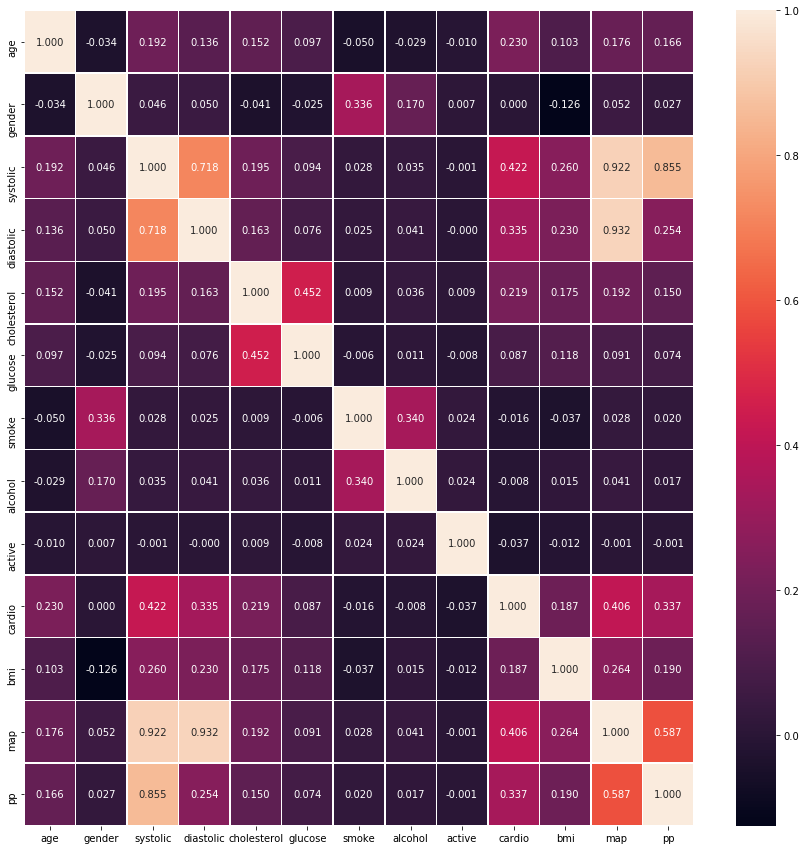

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [226]:
evaluation = pd.DataFrame({'Model': Model, 
                           'Accuracy': Accuracy, 
                           'Precision': Precision, 
                           'Recall': Recall,
                           'F1 Score': F1, 
                           'AUC': AUC})
print("Results for Training Score ")
evaluation

Results for Training Score 


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.714013,0.739757,0.690361,0.709671,0.771674
1,KNN Classifier,0.707155,0.716341,0.698134,0.707106,0.760960
2,Xgboost Classifier,0.726208,0.744693,0.699031,0.721112,0.791384
3,Gaussian NB Classifier,0.725762,0.743698,0.699549,0.720926,0.791369
4,Multinomial NB Classifier,0.725762,0.743698,0.699549,0.720926,0.791369


In [36]:
def model_evaluation(feature,target,dt,knn,xgb,nb,rf,drop_list):
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import cross_val_score

    Model = []
    Accuracy = []
    Precision = []
    Recall = []
    F1 = []
    AUC = []
    scaler = StandardScaler()
    scaler.fit(feature)
    X_scaled= scaler.transform(X)
    cv=10
    
    Model.append("Decision Tree Classifier")
    Accuracy.append(cross_val_score(dt, X_scaled,y, cv=cv, scoring='accuracy').mean())
    Precision.append(cross_val_score(dt, X_scaled,y, cv=cv, scoring='precision').mean())
    Recall.append(cross_val_score(dt, X_scaled,y, cv=cv, scoring='recall').mean())
    F1.append(cross_val_score(dt, X_scaled,y, cv=cv, scoring='f1').mean())
    AUC.append(cross_val_score(dt, X_scaled,y, cv=cv, scoring='roc_auc').mean())
    
    Model.append("KNN Classifier")
    Accuracy.append(cross_val_score(knn, X_scaled,y, cv=cv, scoring='accuracy').mean())
    Precision.append(cross_val_score(knn, X_scaled,y, cv=cv, scoring='precision').mean())
    Recall.append(cross_val_score(knn, X_scaled,y, cv=cv, scoring='recall').mean())
    F1.append(cross_val_score(knn, X_scaled,y, cv=cv, scoring='f1').mean())
    AUC.append(cross_val_score(knn, X_scaled,y, cv=cv, scoring='roc_auc').mean())
    
    Model.append("Xgboost Classifier")
    Accuracy.append(cross_val_score(xgb, X_scaled,y, cv=cv, scoring='accuracy').mean())
    Precision.append(cross_val_score(xgb, X_scaled,y, cv=cv, scoring='precision').mean())
    Recall.append(cross_val_score(xgb, X_scaled,y, cv=cv, scoring='recall').mean())
    F1.append(cross_val_score(xgb, X_scaled,y, cv=cv, scoring='f1').mean())
    AUC.append(cross_val_score(xgb, X_scaled,y, cv=cv, scoring='roc_auc').mean())
    
    Model.append("Gaussian NB Classifier")
    Accuracy.append(cross_val_score(nb, X_scaled,y, cv=cv, scoring='accuracy').mean())
    Precision.append(cross_val_score(nb, X_scaled,y, cv=cv, scoring='precision').mean())
    Recall.append(cross_val_score(nb, X_scaled,y, cv=cv, scoring='recall').mean())
    F1.append(cross_val_score(nb, X_scaled,y, cv=cv, scoring='f1').mean())
    AUC.append(cross_val_score(nb, X_scaled,y, cv=cv, scoring='roc_auc').mean())
    
    Model.append("Random Forest Classifier")
    Accuracy.append(cross_val_score(rf, X_scaled,y, cv=cv, scoring='accuracy').mean())
    Precision.append(cross_val_score(rf, X_scaled,y, cv=cv, scoring='precision').mean())
    Recall.append(cross_val_score(rf, X_scaled,y, cv=cv, scoring='recall').mean())
    F1.append(cross_val_score(rf, X_scaled,y, cv=cv, scoring='f1').mean())
    AUC.append(cross_val_score(rf, X_scaled,y, cv=cv, scoring='roc_auc').mean())
    
    for i in drop_list:
        print(i,end=',')
        
    evaluation = pd.DataFrame({'Model': Model, 
                           'Accuracy': Accuracy, 
                           'Precision': Precision, 
                           'Recall': Recall,
                           'F1 Score': F1, 
                           'AUC': AUC})
    return evaluation
        
    

    
    

    
    

    

In [280]:
#with pp
drop_list=['systolic', 'diastolic','map','cardio']
X=df.drop(drop_list,axis=1)
y=df['cardio']

model_evaluation(X,y,dt,knn,xgb,nb,rf,drop_list)

systolic,diastolic,map,cardio,

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.692839,0.705123,0.672325,0.683914,0.747963
1,KNN Classifier,0.703249,0.714990,0.688268,0.701370,0.766157
2,Xgboost Classifier,0.702511,0.714076,0.687910,0.700743,0.766248
3,Gaussian NB Classifier,0.665237,0.733607,0.532025,0.616761,0.737625
4,Random Forest Classifier,0.701112,0.713213,0.685269,0.698951,0.764986


In [281]:
drop_list=['pp', 'diastolic','map','cardio']
X=df.drop(drop_list,axis=1)
y=df['cardio']

model_evaluation(X,y,dt,knn,xgb,nb,rf,drop_list)

pp,diastolic,map,cardio,

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree Classifier,0.718734,0.740640,0.693843,0.713339,0.780053
1,KNN Classifier,0.731297,0.750500,0.703031,0.725984,0.797228
2,Xgboost Classifier,0.731297,0.750392,0.703284,0.726063,0.797452
3,Gaussian NB Classifier,0.696406,0.757880,0.588379,0.662456,0.766702
4,Random Forest Classifier,0.730452,0.752117,0.697627,0.723829,0.796514
